100.0%┣██████████████████████████████████████████┫ 1/1 [00:00<Inf:Inf, 0.0 it/s]


┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Changepoint{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:231
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:231
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Changepoint{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:233
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:233


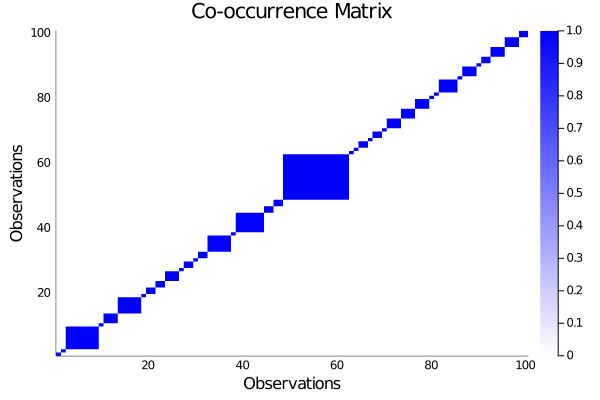

In [15]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)
data_covariance = Matrix{Float64}(0.1I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

changepoint_model = Ntl.Models.Changepoint(ntl_cluster_parameters, data_parameters)

changepoint = Ntl.Generate.generate(changepoint_model, n=100)
data = Matrix(transpose(changepoint[:, 2:end]))
true_changepoints = changepoint[:, 1]
Ntl.Plot.plot_assignments(true_changepoints)
Ntl.Plot.plot_co_occurrence_matrix(true_changepoints)

100.0%┣██████████████████████████████████┫ 10000/10000 [00:15<00:00, 686.6 it/s]
100.0%┣█████████████████████████████████┫ 10000/10000 [00:05<00:00, 1912.4 it/s]


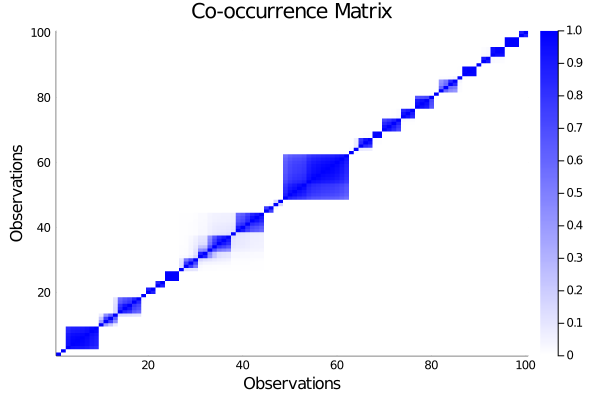

In [12]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=10000)
(results, log_likelihoods) = Ntl.Fitter.fit(data, changepoint_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(results)

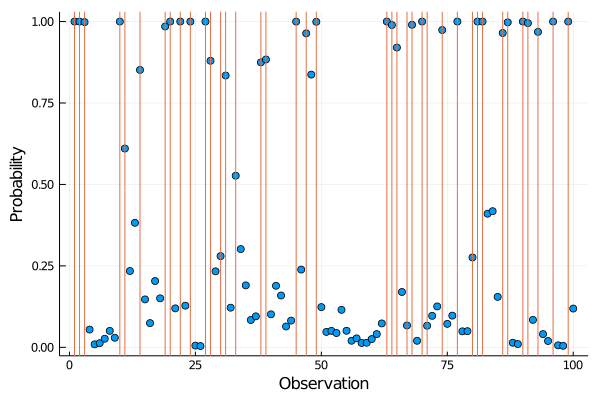

In [13]:
Ntl.Plot.plot_arrival_posterior_probabilities(results, true_changepoints)

100.0%┣██████████████████████████████████┫ 10000/10000 [00:13<00:00, 799.8 it/s]
100.0%┣█████████████████████████████████┫ 10000/10000 [00:05<00:00, 1829.9 it/s]


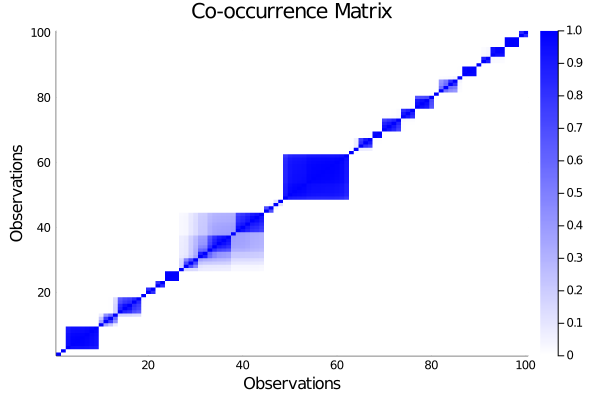

In [16]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=10000)
dp_parameters = Ntl.Models.DpParameters(1, 1)
dp_changepoint_model = Ntl.Models.Changepoint(dp_parameters, data_parameters)
(dp_results, log_likelihoods) = Ntl.Fitter.fit(data, dp_changepoint_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(dp_results)

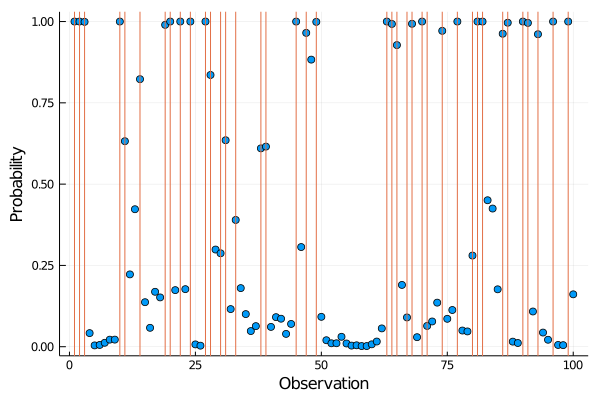

In [17]:
Ntl.Plot.plot_arrival_posterior_probabilities(dp_results, true_changepoints)